<a href="https://colab.research.google.com/github/ehpub/KFQ_DL_2023-/blob/main/2023_kfq_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%EC%83%9D%EC%84%B1_%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

## Sequential 모델 사용

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

In [ ]:
model = models.Sequential([
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax')
         ]
                          )

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.build(input_shape=(None,3))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.14885207,  0.28168434,  0.08190265, -0.18577394, -0.02220252,
          0.02241588, -0.05809928,  0.2198708 ,  0.06312186,  0.0853284 ,
          0.2651093 ,  0.17615315,  0.23389369,  0.17589048,  0.03577089,
         -0.29901165, -0.10837239, -0.02493086,  0.09006622,  0.09768897,
          0.22430998,  0.28143603,  0.24083453, -0.23235539, -0.25792074,
         -0.18024401, -0.01212969, -0.25060257,  0.29074085,  0.15894231,
         -0.23345771,  0.04593447,  0.19249037,  0.21968418,  0.15819696,
          0.0099394 , -0.06424464,  0.21297055, -0.23221783, -0.06005399,
          0.07640383, -0.1625995 , -0.05976075, -0.02752236,  0.15213197,
         -0.20746577,  0.02661565, -0.2846024 , -0.07349549, -0.29547083,
         -0.16368198, -0.18744469, -0.05533528, -0.27457166, -0.18229504,
         -0.27796453, -0.17822403, -0.01726907,  0.03486621, -0.12177129,
         -0.08634844,  0.18594709, -0.27163

In [ ]:
model = models.Sequential(name='jinmoon_s_model')
model.add(layers.Dense(64,activation='relu',name='comic'))
model.add(layers.Dense(10,activation='softmax',name='youna'))
model.build(input_shape=(None,10))
model.summary()

Model: "jinmoon_s_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 comic (Dense)               (None, 64)                704       
                                                                 
 youna (Dense)               (None, 10)                650       
                                                                 
Total params: 1,354
Trainable params: 1,354
Non-trainable params: 0
_________________________________________________________________


## 함수형

In [2]:
inputs = keras.Input(shape=(3,),name="my_input")
hidden1 = layers.Dense(64,activation='relu')(inputs)
outputs = layers.Dense(10,activation='softmax')(hidden1)

In [3]:
model = keras.Model(inputs=inputs,outputs=outputs)

In [4]:
inputs.shape

TensorShape([None, 3])

In [5]:
hidden1.shape

TensorShape([None, 64])

In [6]:
outputs.shape

TensorShape([None, 10])

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 다중 입력 다중 출력

In [9]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [10]:
title = keras.Input(shape=(vocabulary_size,),name='title')
body = keras.Input(shape=(vocabulary_size,),name='body')
tags = keras.Input(shape=(num_tags,),name='tags')

In [13]:
data = layers.Concatenate()([title,body,tags])
hidden = layers.Dense(64,activation='relu')(data)

In [14]:
priority = layers.Dense(1,activation='sigmoid',name='priority')(hidden)
department = layers.Dense(num_departments,activation='softmax',
                          name='department')(hidden)

In [15]:
model = keras.Model(inputs=[title,body,tags], outputs=[priority,department])

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 body (InputLayer)              [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'body[0][0]',             

In [18]:
import numpy as np

In [17]:
num_samples = 1280

In [22]:
title_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
body_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
tag_data = np.random.randint(0,vocabulary_size,size=(num_samples,num_tags))

In [24]:
priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0,2,size=(num_samples,num_departments))

In [27]:
model.compile(optimizer='rmsprop',
              loss=['mse','categorical_crossentropy'],
              metrics=[['mae'],['accuracy']])

In [ ]:
#model.compile(optimizer='rmsprop',
#              loss={'priority':'mse','department':'categorical_crossentropy' },
#              metrics={'priority':['mae'],'department':['accuracy']})

In [ ]:
#model.fit({"title":title_data,"body":body_data,"tags":tag_data},
# {'priority':priority_data,'department':department_data},epochs=20)

In [28]:
model.fit([title_data,body_data,tag_data],
 [priority_data,department_data],epochs=20)

Epoch 1/20
40/40 [==============================] - 3s 20ms/step - loss: 1467.5018 - priority_loss: 0.3351 - department_loss: 1467.1666 - priority_mae: 0.5038 - department_accuracy: 0.2492
Epoch 2/20
40/40 [==============================] - 1s 20ms/step - loss: 1315.1862 - priority_loss: 0.3275 - department_loss: 1314.8583 - priority_mae: 0.4961 - department_accuracy: 0.2516
Epoch 3/20
40/40 [==============================] - 1s 28ms/step - loss: 1667.7572 - priority_loss: 0.3275 - department_loss: 1667.4297 - priority_mae: 0.4961 - department_accuracy: 0.2734
Epoch 4/20
40/40 [==============================] - 1s 20ms/step - loss: 2129.3076 - priority_loss: 0.3275 - department_loss: 2128.9800 - priority_mae: 0.4961 - department_accuracy: 0.2492
Epoch 5/20
40/40 [==============================] - 1s 25ms/step - loss: 2357.7068 - priority_loss: 0.3275 - department_loss: 2357.3789 - priority_mae: 0.4961 - department_accuracy: 0.2617
Epoch 6/20
40/40 [==============================] - 1s 

In [29]:
model.evaluate([title_data,body_data,tag_data],
 [priority_data,department_data])

40/40 [==============================] - 1s 9ms/step - loss: 10024.6348 - priority_loss: 0.3275 - department_loss: 10024.3076 - priority_mae: 0.4961 - department_accuracy: 0.0664


[10024.634765625,
 0.32754024863243103,
 10024.3076171875,
 0.4961269795894623,
 0.06640625]

In [30]:
model.predict([title_data,body_data,tag_data])

40/40 [==============================] - 1s 17ms/step


[array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[0.        , 0.        , 0.        , 0.99999994],
        [0.        , 0.        , 0.        , 0.99999994],
        [0.        , 0.        , 0.        , 0.99999994],
        ...,
        [0.        , 0.        , 0.        , 0.99999994],
        [0.        , 0.        , 0.        , 0.99999994],
        [0.        , 0.        , 0.        , 0.99999994]], dtype=float32)]

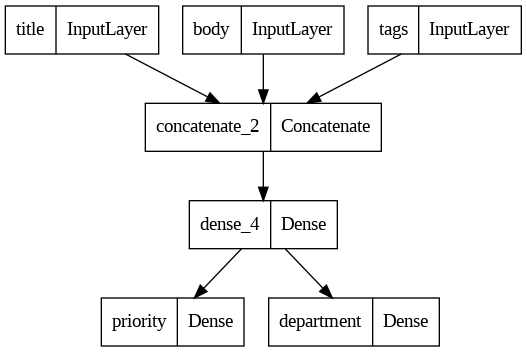

In [33]:
keras.utils.plot_model(model)

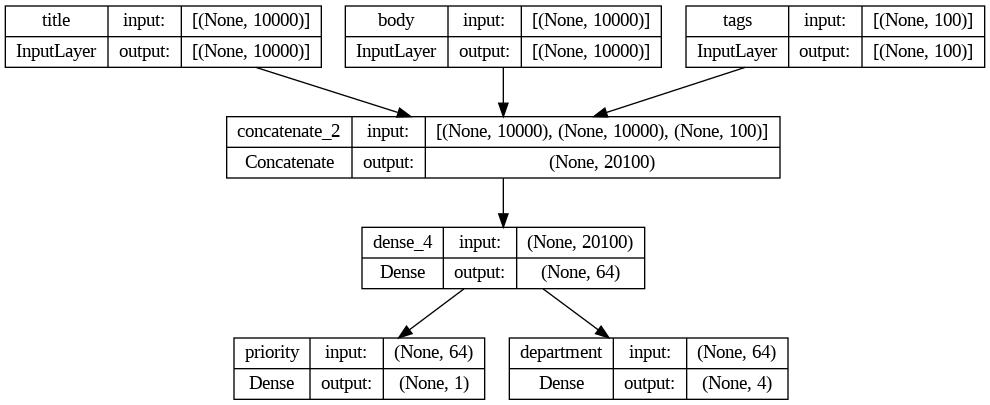

In [34]:
keras.utils.plot_model(model,show_shapes=True)

In [35]:
model.layers

In [37]:
model.layers[0].input

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>

In [38]:
model.layers[0].output

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>

In [40]:
model.layers[4].input

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_2')>

In [41]:
model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_4')>

In [42]:
hidden  = model.layers[4].output

In [43]:
difficulty = layers.Dense(3,activation='softmax',name='difficulty')(hidden)

In [44]:
nm = keras.Model(
    inputs = [title,body,tags],
    outputs=[priority,department,difficulty]
)

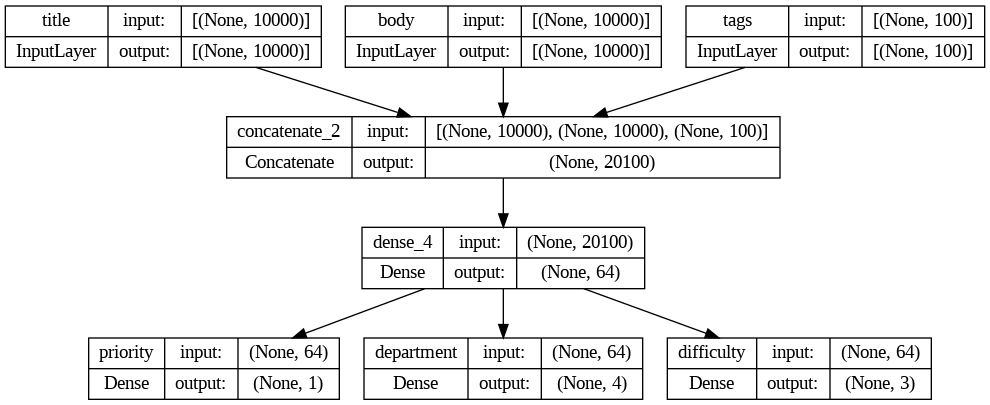

In [45]:
keras.utils.plot_model(nm,show_shapes=True)

In [76]:
class CustomerTicketModel(keras.Model):
  def __init__(self,num_departments):
    super().__init__() #기반 클래스의 __init__ 호출
    self.data_layer = layers.Concatenate()
    self.hidden_layer = layers.Dense(64,activation='relu')
    self.priority_layer = layers.Dense(1,activation='sigmoid',name='priority')
    self.department_layer = layers.Dense(num_departments,activation='softmax',
                          name='department')
  def call(self,inputs): # yp = wx+b 포워딩
    title = inputs[0]
    body = inputs[1]
    tags = inputs[2]
    data = self.data_layer([title,body,tags])
    hidden = self.hidden_layer(data)
    priority = self.priority_layer(hidden)
    department = self.department_layer(hidden)
    return priority, department

In [81]:
#input_dic = {'title':title_data, 'body':body_data, 'tags':tag_data}
#priority, department = model(input_dic) #call 함수를 호출함
model = CustomerTicketModel(4)
priority, department = model([title_data,body_data,tag_data]) #call 함수를 호출함
print(priority)
print(department)

tf.Tensor(
[[0.0000000e+00]
 [2.2034392e-31]
 [0.0000000e+00]
 ...
 [1.0292226e-17]
 [0.0000000e+00]
 [1.0000000e+00]], shape=(1280, 1), dtype=float32)
tf.Tensor(
[[0.99999994 0.         0.         0.        ]
 [0.99999994 0.         0.         0.        ]
 [0.99999994 0.         0.         0.        ]
 ...
 [0.99999994 0.         0.         0.        ]
 [0.99999994 0.         0.         0.        ]
 [0.99999994 0.         0.         0.        ]], shape=(1280, 4), dtype=float32)


In [82]:
model = CustomerTicketModel(4)
model.compile(optimizer='rmsprop',
              loss=['mse','categorical_crossentropy'],
              metrics=[['mae'],['accuracy']])
model.fit(
    [title_data,body_data,tag_data],
    [priority_data,department_data],epochs=20)

Epoch 1/20
40/40 [==============================] - 3s 32ms/step - loss: 1634.5165 - output_1_loss: 0.3275 - output_2_loss: 1634.1892 - output_1_mae: 0.4961 - output_2_accuracy: 0.2734
Epoch 2/20
40/40 [==============================] - 1s 22ms/step - loss: 1660.6052 - output_1_loss: 0.3275 - output_2_loss: 1660.2777 - output_1_mae: 0.4961 - output_2_accuracy: 0.2539
Epoch 3/20
40/40 [==============================] - 1s 23ms/step - loss: 1979.7428 - output_1_loss: 0.3275 - output_2_loss: 1979.4156 - output_1_mae: 0.4961 - output_2_accuracy: 0.2555
Epoch 4/20
40/40 [==============================] - 1s 24ms/step - loss: 2243.8687 - output_1_loss: 0.3275 - output_2_loss: 2243.5413 - output_1_mae: 0.4961 - output_2_accuracy: 0.2594
Epoch 5/20
40/40 [==============================] - 1s 24ms/step - loss: 2760.9343 - output_1_loss: 0.3275 - output_2_loss: 2760.6069 - output_1_mae: 0.4961 - output_2_accuracy: 0.2453
Epoch 6/20
40/40 [==============================] - 1s 23ms/step - loss: 32

### 혼합

In [86]:
class Classifier(keras.Model): #분류기
  def __init__(self,num_classes=2):
    super().__init__()
    if num_classes <= 2:
      num_units = 1 #출력 뉴런 개수가 1
      activation ='sigmoid'
    else:
      num_units = num_classes
      activation = 'softmax'
    self.dense = layers.Dense(num_units,activation=activation)
  def call(self,inputs):
    return self.dense(inputs)

In [87]:
inputs = keras.Input(shape=(3,))
hidden = layers.Dense(64,activation='relu')(inputs)
perceptron = Classifier(num_classes=10)
outputs = perceptron(hidden)
model = keras.Model(inputs = inputs, outputs = outputs)

In [88]:
inputs = keras.Input(shape=(3,))
hidden = layers.Dense(64,activation='relu')(inputs)
perceptron = Classifier(num_classes=2)
outputs = perceptron(hidden)
model = keras.Model(inputs = inputs, outputs = outputs)

In [100]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1,activation='sigmoid')(inputs)
bc = keras.Model(inputs = inputs, outputs = outputs)

class MyModel(keras.Model):
  def __init__(self,num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64,activation='relu')
    self.classifier = bc
  def call(self,inputs):
    hidden = self.dense(inputs)
    return self.classifier(hidden)

In [102]:
model = MyModel()
model.compile(optimizer='rmsprop',
              loss=keras.losses.binary_crossentropy)

In [103]:
data = np.random.random(size=(1000,200))
data.shape
label = np.array([i%2==0 for i in range(1000)])

In [ ]:
model.fit(data,label,epochs=100)

In [105]:
model.summary()

Model: "my_model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            multiple                  12864     
                                                                 
 model_6 (Functional)        (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________
